<a href="https://colab.research.google.com/github/cairoegito/Previsao-de-alugueis-no-Quinto-Andar/blob/main/Previs%C3%A3o_no_Quinto_Andar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1- Problema de negócio**

Auxiliar a equipe do Quinto Andar no orçamento dado a determinado imóvel de acordo com possibilidades diferentes, como tamanho e localizações distintas na cidade. Analisar possíveis e diferentes cenários para proporcionar um valor mais justo para cada imóvel.

**2- Importando Bibliotecas**

In [48]:
# Bibliotecas para EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Bibliotecas de Machine Learning
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest

**3-Análise Exploratória de Dados**

In [5]:
df= pd.read_csv("/content/drive/MyDrive/Quinto Andar/base.csv", sep=',');

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Analisando o tamanho de meu dataframe
df.shape

(1460, 81)

In [9]:
#Observando estatisticamente melhor meu dataframe
df.describe()

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,...,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#Vamos ver os tipo de variáveis em nosso dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [11]:
#Observando possíveis dados faltantes
df.isnull().sum().head(40)

Id                       0
ClasseImovel             0
ClasseZona               0
Fachada                259
TamanhoLote              0
Rua                      0
Beco                  1369
FormaProp                0
PlanoProp                0
Servicos                 0
ConfigLote               0
InclinacaoLote           0
Bairro                   0
Estrada1                 0
Estrada2                 0
TipoHabitacao            0
EstiloHabitacao          0
Qualidade                0
Condicao                 0
AnoConstrucao            0
AnoReforma               0
TipoTelhado              0
MaterialTelhado          0
Exterior1                0
Exterior2                0
TipoAlvenaria            8
AreaAlvenaria            8
QualidadeCobertura       0
CondicaoExterna          0
TipoFundacao             0
AlturaPorao             37
CondicaoPorao           37
ParedePorao             38
TipoAcabPorao1          37
AreaAcabPorao1           0
TipoAcabPorao2          38
AreaAcabPorao2           0
A

In [12]:
#Observando possíveis dados faltantes
df.isnull().sum().tail(40)

ArCentral                  0
InstalacaoEletrica         1
AreaTerreo                 0
Area2Andar                 0
BaixaQualiAreaAcab         0
AreaConstruida             0
BanheiroPorao              0
LavaboPorao                0
Banheiro                   0
Lavabo                     0
BedroomAbvGr               0
KitchenAbvGr               0
QualidadeCozinha           0
TotalQuartos               0
Funcionalidade             0
Lareira                    0
QualdiadeLareira         690
LocalGaragem              81
AnoGaragem                81
AcabamentoGaragem         81
CarrosGaragem              0
AreaGaragem                0
QualidadeGaragem          81
CondicaoGaragem           81
EntradaPavimentada         0
AreaDeck                   0
AreaVarandaAberta          0
AreaVarandaFechada         0
AreaVaranda3Estacoes       0
AreaAlpendre               0
AreaPiscina                0
QualidadePiscina        1453
QualidadeCerca          1179
Outros                  1406
ValorOutros   

In [13]:
#Tratamento dos missings
df["QualidadePiscina"] = df["QualidadePiscina"].fillna(0)
df["QualidadeCerca"] = df["QualidadeCerca"].fillna(0)
df["Outros"] = df["Outros"].fillna(0)
df["Beco"]= df["Beco"].fillna(0)
df["InstalacaoEletrica"] = df["InstalacaoEletrica"].fillna(0)
df["Fachada"] = df["Fachada"].fillna(70.05)
df["AlturaPorao"] = df["AlturaPorao"].fillna("TA")
df["CondicaoPorao"] = df["CondicaoPorao"].fillna("TA")
df["ParedePorao"] = df["ParedePorao"].fillna("No")
df["TipoAcabPorao1"] = df["TipoAcabPorao1"].fillna("Unf")
df["TipoAcabPorao2"] = df["TipoAcabPorao2"].fillna("Unf")
df["InstalacaoEletrica"] = df["InstalacaoEletrica"].fillna("SBrkr")
df["QualdiadeLareira"] = df["QualdiadeLareira"].fillna("Gd")
df["LocalGaragem"] = df["LocalGaragem"].fillna("Attchd")
df["AnoGaragem"] = df["AnoGaragem"].fillna(1978.50)
df["AcabamentoGaragem"] = df["AcabamentoGaragem"].fillna("Unf")
df["QualidadeGaragem"] = df["QualidadeGaragem"].fillna("TA")
df["CondicaoGaragem"] = df["CondicaoGaragem"].fillna("TA")

In [14]:
#Checando novamente o dataset e eliminação dos missings
df.isnull().sum().head(40)

Id                    0
ClasseImovel          0
ClasseZona            0
Fachada               0
TamanhoLote           0
Rua                   0
Beco                  0
FormaProp             0
PlanoProp             0
Servicos              0
ConfigLote            0
InclinacaoLote        0
Bairro                0
Estrada1              0
Estrada2              0
TipoHabitacao         0
EstiloHabitacao       0
Qualidade             0
Condicao              0
AnoConstrucao         0
AnoReforma            0
TipoTelhado           0
MaterialTelhado       0
Exterior1             0
Exterior2             0
TipoAlvenaria         8
AreaAlvenaria         8
QualidadeCobertura    0
CondicaoExterna       0
TipoFundacao          0
AlturaPorao           0
CondicaoPorao         0
ParedePorao           0
TipoAcabPorao1        0
AreaAcabPorao1        0
TipoAcabPorao2        0
AreaAcabPorao2        0
AreaInacabPorao       0
AreaPorao             0
Aquecimento           0
dtype: int64

In [15]:
#Checando novamente o dataset e eliminação dos missings
df.isnull().sum().tail(41)

QualidadeAquecimento    0
ArCentral               0
InstalacaoEletrica      0
AreaTerreo              0
Area2Andar              0
BaixaQualiAreaAcab      0
AreaConstruida          0
BanheiroPorao           0
LavaboPorao             0
Banheiro                0
Lavabo                  0
BedroomAbvGr            0
KitchenAbvGr            0
QualidadeCozinha        0
TotalQuartos            0
Funcionalidade          0
Lareira                 0
QualdiadeLareira        0
LocalGaragem            0
AnoGaragem              0
AcabamentoGaragem       0
CarrosGaragem           0
AreaGaragem             0
QualidadeGaragem        0
CondicaoGaragem         0
EntradaPavimentada      0
AreaDeck                0
AreaVarandaAberta       0
AreaVarandaFechada      0
AreaVaranda3Estacoes    0
AreaAlpendre            0
AreaPiscina             0
QualidadePiscina        0
QualidadeCerca          0
Outros                  0
ValorOutros             0
MesVenda                0
AnoVenda                0
TipoVenda   

In [16]:
#Visualizando as colunas
df.columns

Index(['Id', 'ClasseImovel', 'ClasseZona', 'Fachada', 'TamanhoLote', 'Rua',
       'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote',
       'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao',
       'EstiloHabitacao', 'Qualidade', 'Condicao', 'AnoConstrucao',
       'AnoReforma', 'TipoTelhado', 'MaterialTelhado', 'Exterior1',
       'Exterior2', 'TipoAlvenaria', 'AreaAlvenaria', 'QualidadeCobertura',
       'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao',
       'ParedePorao', 'TipoAcabPorao1', 'AreaAcabPorao1', 'TipoAcabPorao2',
       'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'Aquecimento',
       'QualidadeAquecimento', 'ArCentral', 'InstalacaoEletrica', 'AreaTerreo',
       'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
       'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
       'QualidadeCozinha', 'TotalQuartos', 'Funcionalidade', 'Lareira',
       'QualdiadeLareira', 'LocalGaragem'

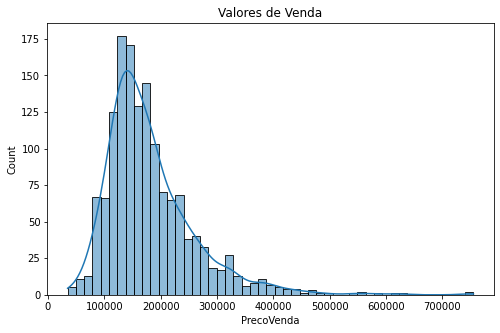

In [17]:
# Relação dos preços de venda das propriedades
plt.figure(figsize=(8,5))
sns.histplot(df["PrecoVenda"], kde = True)
plt.title("Valores de Venda")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


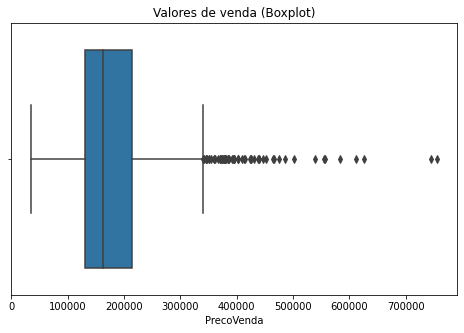

In [18]:
#Analisando possíveis outliers da variável PrecoVenda 
plt.figure(figsize=(8,5))
sns.boxplot(df["PrecoVenda"])
plt.title("Valores de venda (Boxplot)")
plt.show()

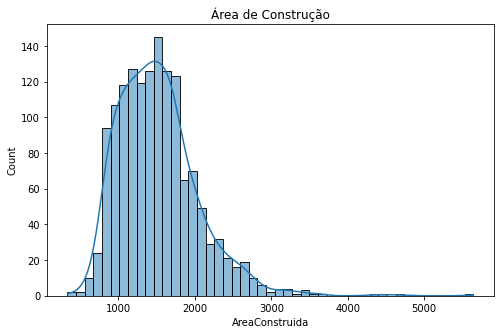

In [19]:
# Verificando tamanho do lote dos terrenos vendidos
plt.figure(figsize=(8,5))
sns.histplot(df["AreaConstruida"], kde = True)
plt.title("Área de Construção")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


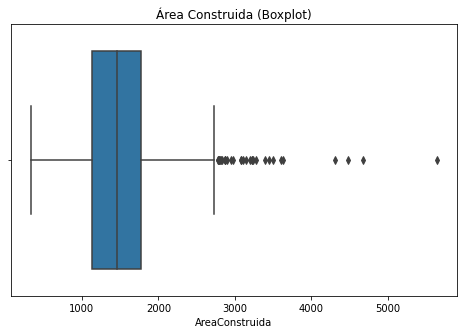

In [20]:
#Analisando possíveis outliers da variável PrecoVenda 
plt.figure(figsize=(8,5))
sns.boxplot(df["AreaConstruida"])
plt.title("Área Construida (Boxplot)")
plt.show()

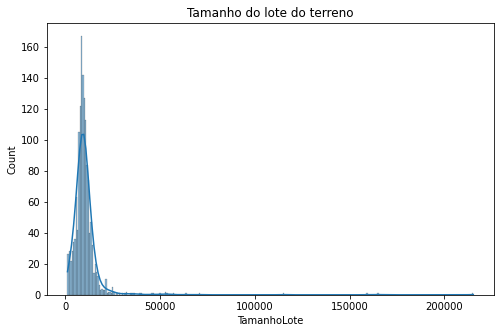

In [21]:
# Verificando tamanho do lote dos terrenos vendidos
plt.figure(figsize=(8,5))
sns.histplot(df["TamanhoLote"], kde = True)
plt.title("Tamanho do lote do terreno")
plt.show()

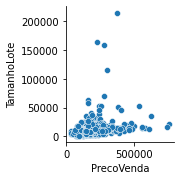

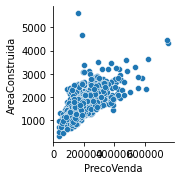

In [22]:
#Agora vamos observar se há uma possível relação entre as variáveis preço de venda e tamanho do lote e preço de venda e área construida 

sns.pairplot(y_vars='TamanhoLote', x_vars=['PrecoVenda'], data=df)

sns.pairplot(y_vars='AreaConstruida', x_vars=['PrecoVenda'], data=df)

#No 1 gráfico notamos que o tamanho do lote não interfere muito no preço, sendo que o tamanho está concentrado em uma região

#No 2 gráfico notamos que há uma forte relação entre área construída e preço de venda

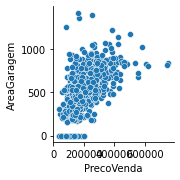

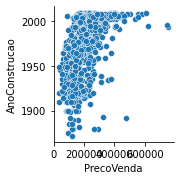

In [23]:
#Agora vamos observar se há uma possível relação entre as variáveis preço de venda e área da garagem e preço de venda e ano de construção da casa

sns.pairplot(y_vars='AreaGaragem', x_vars=['PrecoVenda'], data=df)

sns.pairplot(y_vars='AnoConstrucao', x_vars=['PrecoVenda'], data=df)

# Há uma boa  correlação entre a área da garagem e o preço de venda, onde são grandezas diretamente proporcionais


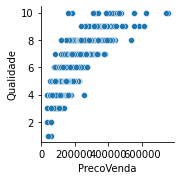

In [24]:
#Agora vamos observar se há uma possível relação entre as variáveis preço de venda e área da garagem e preço de venda e ano de construção da casa

sns.pairplot(y_vars='Qualidade', x_vars=['PrecoVenda'], data=df)

# Há uma boa  correlação entre a Qualidade e o preço de venda, onde são grandezas diretamente proporcionais

In [25]:
# Checando mais correlações com o preço de venda
df.corr()["PrecoVenda"].sort_values(ascending= False)


PrecoVenda              1.000000
Qualidade               0.790982
AreaConstruida          0.708624
CarrosGaragem           0.640409
AreaGaragem             0.623431
AreaPorao               0.613581
AreaTerreo              0.605852
Banheiro                0.560664
TotalQuartos            0.533723
AnoConstrucao           0.522897
AnoReforma              0.507101
AreaAlvenaria           0.477493
AnoGaragem              0.470191
Lareira                 0.466929
AreaAcabPorao1          0.386420
Fachada                 0.334901
AreaDeck                0.324413
Area2Andar              0.319334
AreaVarandaAberta       0.315856
Lavabo                  0.284108
TamanhoLote             0.263843
BanheiroPorao           0.227122
AreaInacabPorao         0.214479
BedroomAbvGr            0.168213
AreaAlpendre            0.111447
AreaPiscina             0.092404
MesVenda                0.046432
AreaVaranda3Estacoes    0.044584
AreaAcabPorao2         -0.011378
LavaboPorao            -0.016844
ValorOutro

In [26]:
#Eliminando outliers da variável PrecoVenda
df2 = df.drop(df[df["PrecoVenda"] > 350000].index)

In [27]:
df2.shape

(1406, 81)

In [28]:
#Utilizando o método OneHotEncoder para transformação em  variáveis numéricas
df2 = pd.get_dummies(df, drop_first = True )

In [29]:
df2.shape


(1460, 252)

**2 - Statsmodel e coeficientes**

In [30]:
df2.head()

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,...,TipoVenda_ConLI,TipoVenda_ConLw,TipoVenda_New,TipoVenda_Oth,TipoVenda_WD,CondicaoVenda_AdjLand,CondicaoVenda_Alloca,CondicaoVenda_Family,CondicaoVenda_Normal,CondicaoVenda_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# Separando para a predição

# iloc[range de linhas, range de colunas] 


x = df2.iloc[: , 1:4]
y = df2['PrecoVenda']  

In [32]:
x.shape

(1460, 3)

In [33]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: PrecoVenda, Length: 1460, dtype: int64

In [34]:
#Criando modelo
modeloo = sm.OLS(list(y),np.array(x))


In [35]:
#Plotando resultado
resultado = modeloo.fit()

In [36]:
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              2776.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        00:31:03   Log-Likelihood:                         -18484.
No. Observations:                1460   AIC:                                  3.697e+04
Df Residuals:                    1457   BIC:                                  3.699e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**INTERPRETANDO O SUMMARY**

- O R2 e o R2 ajustados são próximos, o que indica que as variáveis são significativas na previsão do termo dependente 
- Como o F está muito elevado e o P valor é 0, temos a rejeição da hipótese nula 
- O valor do teste t (analisa cada feature individualmente com a variável preditiva) positivos indicam uma rejeição a hipótese nula, nos levando a aceitar novamente que utilizamos variáveis relevantes na predição

**3- Regressão Linear**

In [37]:
#Rearranjando dataset para a previsão com features mais importantes
df2 = df2[["Qualidade", "AreaConstruida", "CarrosGaragem" , "AreaGaragem",'PrecoVenda' ]]
df2.head()

,Qualidade,AreaConstruida,CarrosGaragem,AreaGaragem,PrecoVenda
0,7,1710,2,548,208500
1,6,1262,2,460,181500
2,7,1786,2,608,223500
3,7,1717,3,642,140000
4,8,2198,3,836,250000


In [38]:
# Separando para a predição
x = df2.iloc[: , :-1]
y = df2.iloc[: , -1]

In [39]:
#Treinando modelo
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.2, random_state=0)

In [40]:
#Criando modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)


LinearRegression()

In [41]:
#Predição
y_pred = modelo.predict(x_test)

In [42]:
#Checando os scores com R2 e MSE
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print((mean_squared_error(y_test, y_pred))**1/2)

0.6815125710484375
2199426399.7607355
1099713199.8803678


**INTERPRETANDO A REGRESSÃO**

Temos um modelo com menor probabilidade de acerto que o anterior, que também pode ter sido influenciado por treinar com apenas 20% dos dados. 